In [63]:
import pickle
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.signal import savgol_filter
import imageio
import pickle
import glob
from moviepy.editor import *

In [36]:
class Prep_Data():
    def __init__(self, path=None, filter_size=401):
        with open(path, "rb") as p:
            data = pickle.load(p)
        
        self.vels = data["vels"]
        self.kds = data["kds"]
        self.dvs = data["dvs"]        
        self.states = data["states"]
        self.vels_smooth = savgol_filter(self.vels, filter_size, 3)
        self.label = path.split("data/")[-1].split("_/")[0]

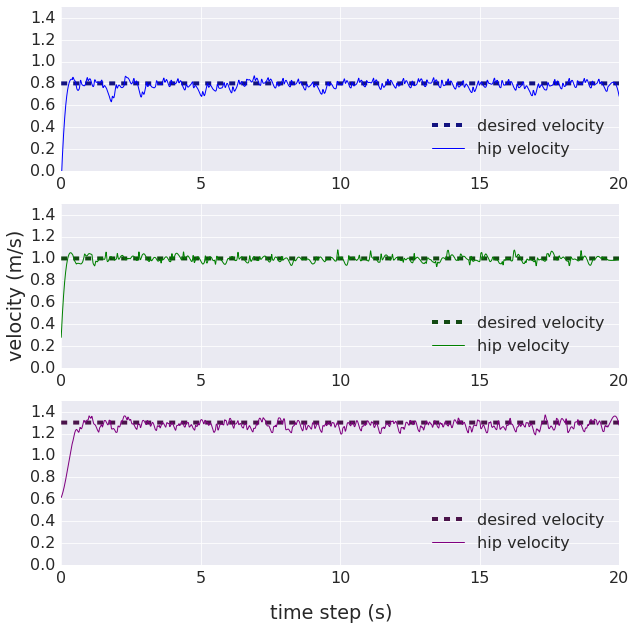

In [48]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2)

blues = sns.dark_palette("blue", 8)
greens = sns.dark_palette("green", 8)
purples = sns.dark_palette("purple", 8)


times = np.arange(10000)*0.002

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="log/1000/data/fix_0.8_/fix_0.8.pkl")
ax1.plot(times, d1.dvs, "--", color=blues[3], linewidth=4, label="desired velocity")
ax1.plot(times, d1.vels_smooth, "-", color=blues[7], linewidth=1, label="hip velocity")
ax1.set_ylim(0., 1.5)
ax1.legend(loc=4)

d2 = Prep_Data(path="log/2000/data/fix_1.0_/fix_1.0.pkl")
ax2.plot(times, d2.dvs, "--", color=greens[3], linewidth=4, label="desired velocity")
ax2.plot(times, d2.vels_smooth, "-", color=greens[7], linewidth=1, label="hip velocity")
ax2.set_ylim(0., 1.5)
ax2.legend(loc=4)

d3 = Prep_Data(path="log/2000/data/fix_1.3_/fix_1.3.pkl")
ax3.plot(times, d3.dvs, "--", color=purples[3], linewidth=4, label="desired velocity")
ax3.plot(times, d3.vels_smooth, "-", color=purples[7], linewidth=1, label="hip velocity")
ax3.set_ylim(0., 1.5)
ax3.legend(loc=4)

f.text(0.5, 0.05, 'time step (s)', ha='center')
f.text(0.05, 0.5, 'velocity (m/s)', va='center', rotation='vertical')

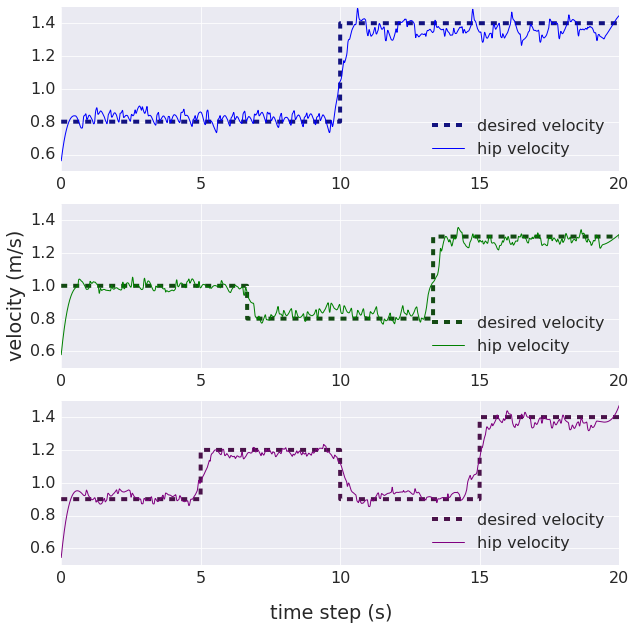

In [47]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2)

blues = sns.dark_palette("blue", 8)
greens = sns.dark_palette("green", 8)
purples = sns.dark_palette("purple", 8)


times = np.arange(10000)*0.002

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="log/2000/data/vary_0.8_1.4_/vary_0.8_1.4_.pkl", filter_size=501)
ax1.plot(times, d1.dvs, "--", color=blues[3], linewidth=4, label="desired velocity")
ax1.plot(times, d1.vels_smooth, "-", color=blues[7], linewidth=1, label="hip velocity")
ax1.set_ylim(0.5, 1.5)
ax1.legend(loc=4)

d2 = Prep_Data(path="log/2000/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl", filter_size=601)
ax2.plot(times, d2.dvs, "--", color=greens[3], linewidth=4, label="desired velocity")
ax2.plot(times, d2.vels_smooth, "-", color=greens[7], linewidth=1, label="hip velocity")
ax2.set_ylim(0.5, 1.5)
ax2.legend(loc=4)

d3 = Prep_Data(path="log/2000/data/vary_0.9_1.2_0.9_1.4_/vary_0.9_1.2_0.9_1.4_.pkl", filter_size=801)
ax3.plot(times, d3.dvs, "--", color=purples[3], linewidth=4, label="desired velocity")
ax3.plot(times, d3.vels_smooth, "-", color=purples[7], linewidth=1, label="hip velocity")
ax3.set_ylim(0.5, 1.5)
ax3.legend(loc=4)

f.text(0.5, 0.05, 'time step (s)', ha='center')
f.text(0.05, 0.5, 'velocity (m/s)', va='center', rotation='vertical')

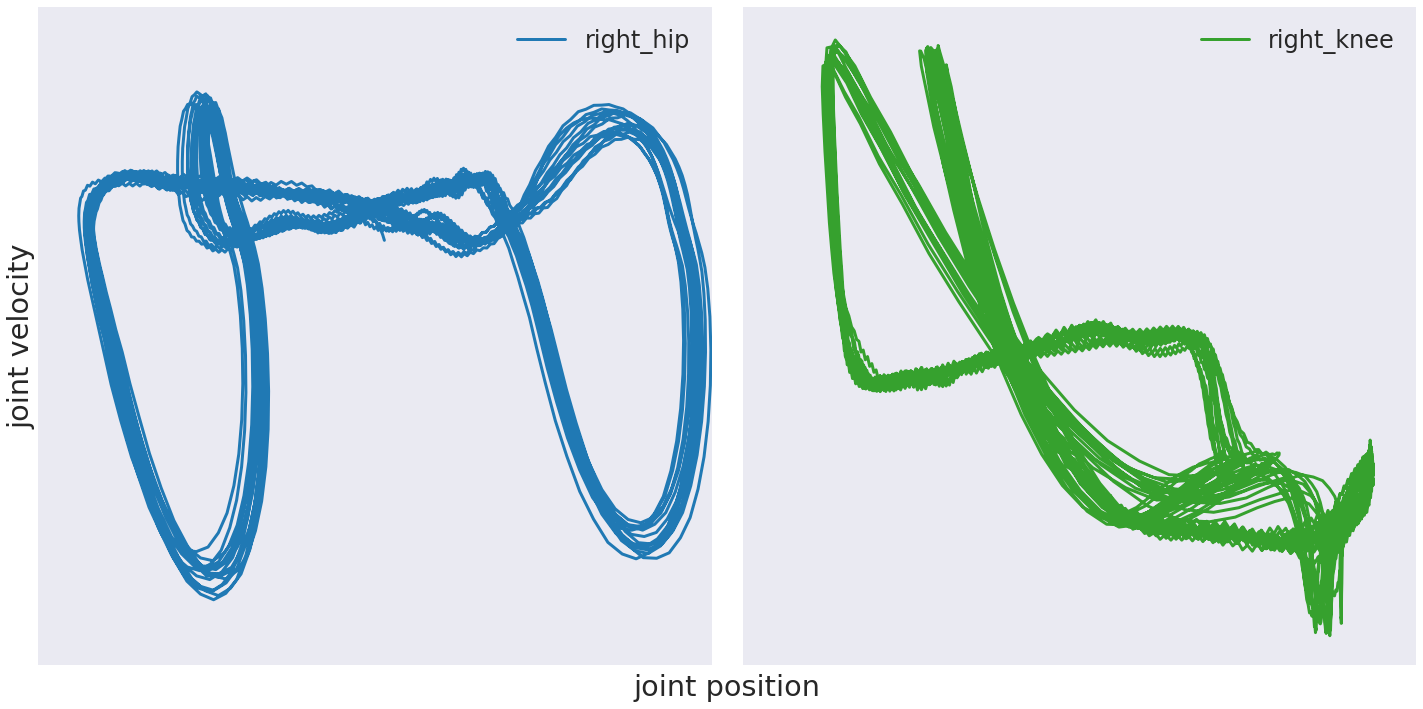

In [58]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
# colors = sns.hls_palette(8, l=.3, s=.8)
colors = sns.color_palette("Paired", 8)
fontsize = 2

d = Prep_Data(path="log/1000/data/fix_1.0_/fix_1.0.pkl")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
joint_names = ["right_hip", "right_knee", "left_hip", "left_knee"]
start = 4000
cycle = 6000


i = 3
ax1.plot(savgol_filter(d.states.T[i][start:start+cycle], 21, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], 21, 3), "-", 
         linewidth=3, color=colors[1], label=joint_names[i-3])
ax1.legend(loc = 0)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])

i = 4
ax2.plot(savgol_filter(d.states.T[i][start:start+cycle], 21, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], 21, 3), "-", 
         linewidth=3, color=colors[3], label=joint_names[i-3])
ax2.legend(loc = 0)
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
    
f.text(0.5, 0.0, 'joint position', ha='center')
f.text(0.0, 0.5, 'joint velocity', va='center', rotation='vertical')
plt.tight_layout()

In [68]:

filename = glob.glob("log/1000/data/fix_0.8_/*.mp4")[0]
image_path = "log/1000/data/fix_0.8_/images/"

vid = imageio.get_reader(filename, 'ffmpeg')
images = []
for i, im in enumerate(vid):
    images += [im]
images = np.array(images)

In [79]:
import os
if not os.path.exists(image_path):
    os.makedirs(image_path)
j = 0
for i in range(images.shape[0]):
    if i > 2130 and i%10==0 and i<2800:
        img_name = image_path + str("%05d" % j)+".jpg"
        img = images[i][150:310, 200:290, :]
        imageio.imwrite(img_name, img)
        j += 1

In [87]:
index = [0,5,10,15,20,25,30,35,45,47,52,58]
frames = []
for ind in index:
    img_name = image_path + str("%05d" % ind)+".jpg"
    frame = imageio.imread(img_name)
    frames += [frame]
motion_img = np.concatenate(frames, axis=1)
imageio.imwrite(image_path+"motion.jpg", motion_img)

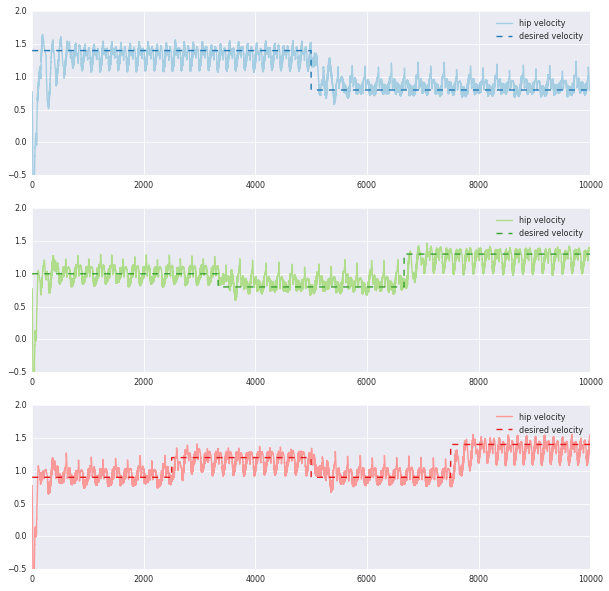

In [47]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="demo/data/vary_1.4_0.8_/vary_1.4_0.8_.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "--", color=colors[1], label="desired velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "--", color=colors[3], label="desired velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="demo/data/vary_0.9_1.2_0.9_1.4_/vary_0.9_1.2_0.9_1.4_.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "--", color=colors[5], label="desired velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=1)


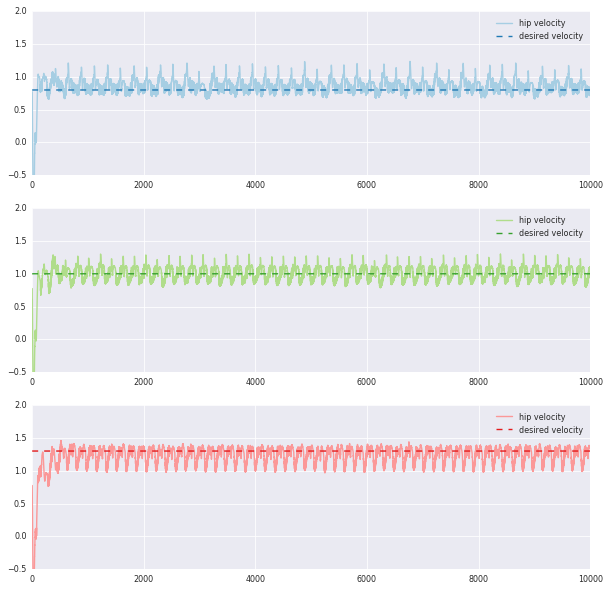

In [48]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "--", color=colors[1], label="desired velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="demo/data/fix_1.0_/fix_1.0.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "--", color=colors[3], label="desired velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="demo/data/fix_1.3_/fix_1.3.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "--", color=colors[5], label="desired velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=1)

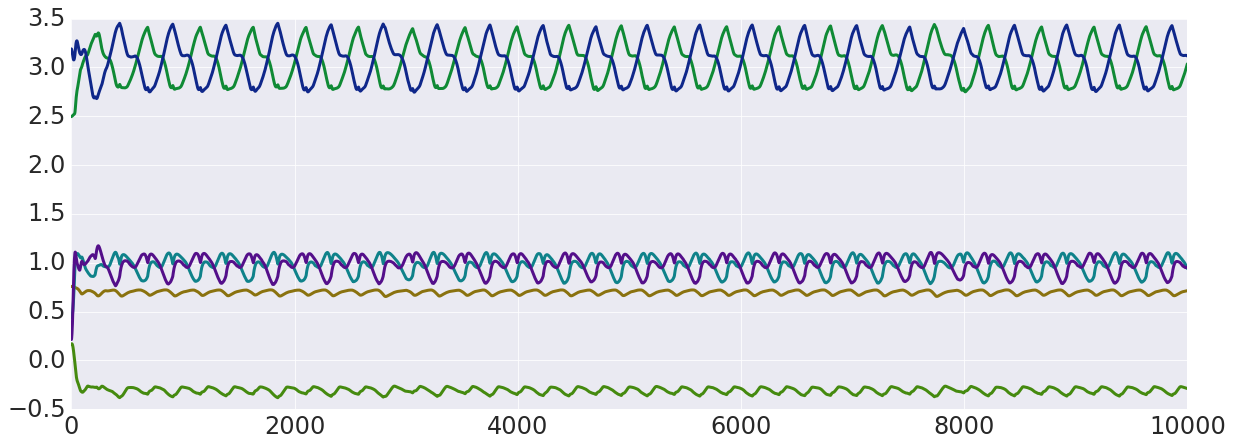

In [29]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
for i in list(range(1,7)):
    ax.plot(d.states.T[i], "-", linewidth=3, color=colors[i], label="joint_position_"+str(i))


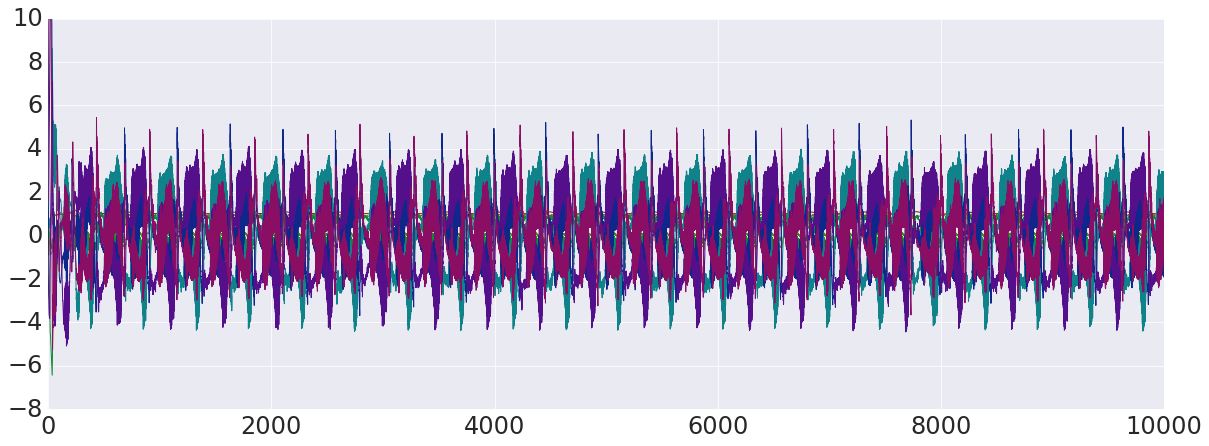

In [35]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
for i in list(range(8)):
    ax.plot(d.states.T[i+6], "-", linewidth=1, color=colors[i], label="joint_position_"+str(i+6))

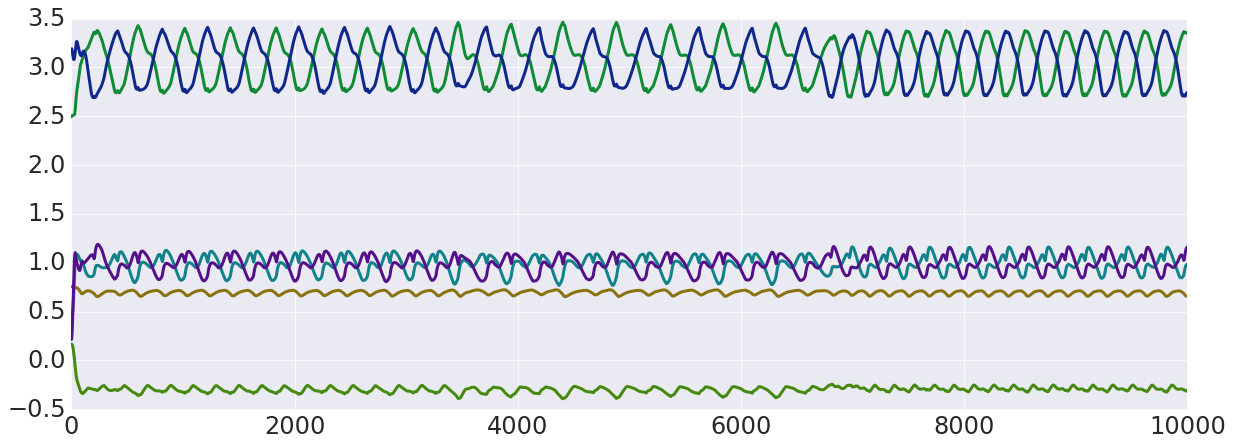

In [38]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
for i in list(range(1,7)):
    ax.plot(d.states.T[i], "-", linewidth=3, color=colors[i], label="joint_position_"+str(i))


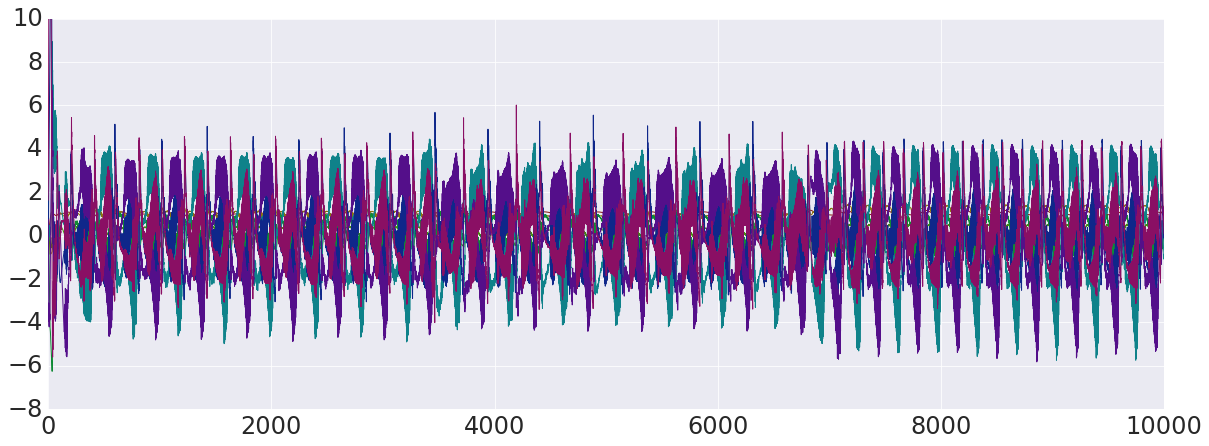

In [39]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
for i in list(range(8)):
    ax.plot(d.states.T[i+6], "-", linewidth=1, color=colors[i], label="joint_position_"+str(i+6))

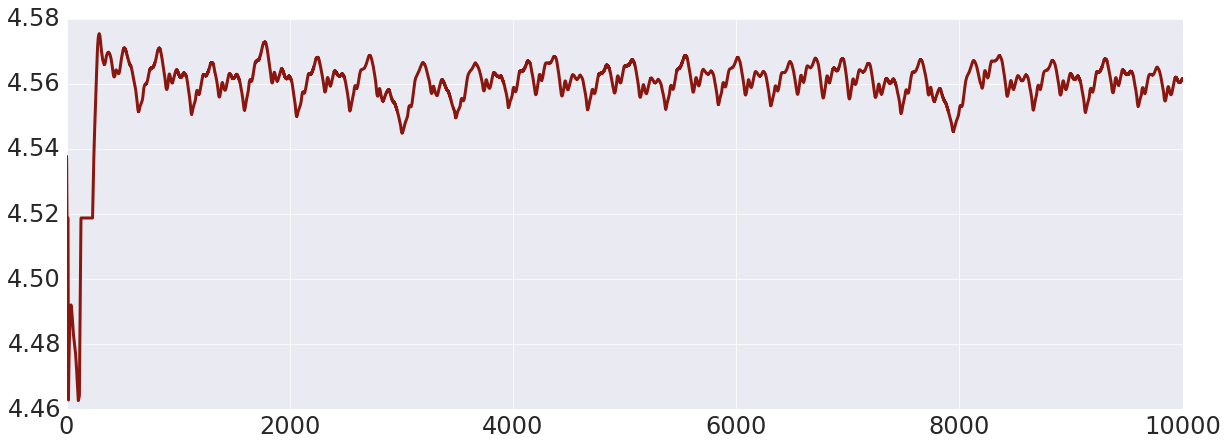

In [5]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
ax.plot(d.kds, "-", linewidth=3, color=colors[0])

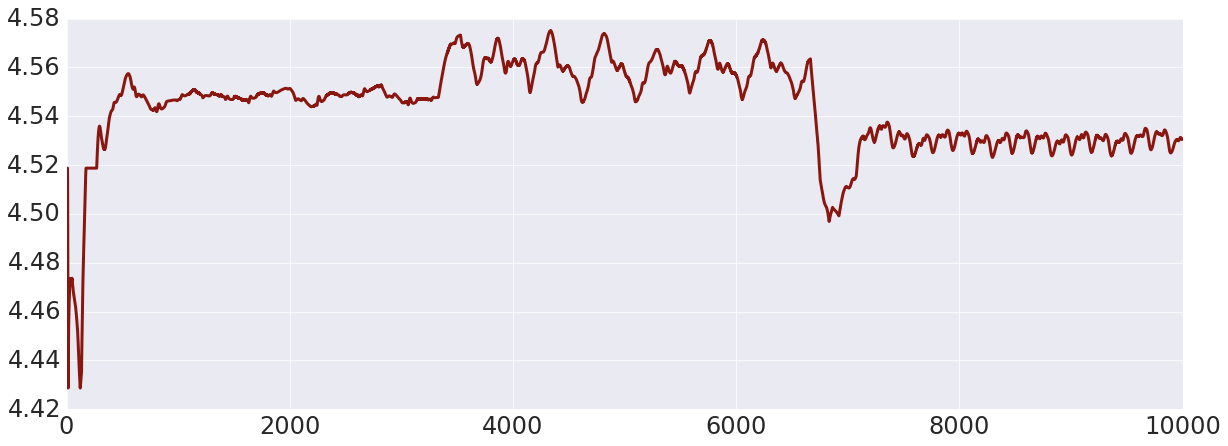

In [6]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
ax.plot(d.kds, "-", linewidth=3, color=colors[0])

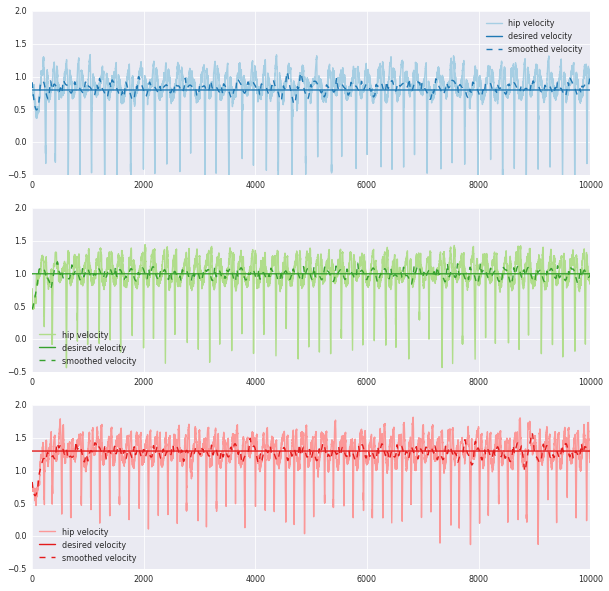

In [13]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="log/2000/data/fix_0.8_/fix_0.8.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "-", color=colors[1], label="desired velocity")
ax1.plot(d1.vels_smooth, "--", color=colors[1], label="smoothed velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="log/2000/data/fix_1.0_/fix_1.0.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "-", color=colors[3], label="desired velocity")
ax2.plot(d2.vels_smooth, "--", color=colors[3], label="smoothed velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="log/2000/data/fix_1.3_/fix_1.3.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "-", color=colors[5], label="desired velocity")
ax3.plot(d3.vels_smooth, "--", color=colors[5], label="smoothed velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=0)

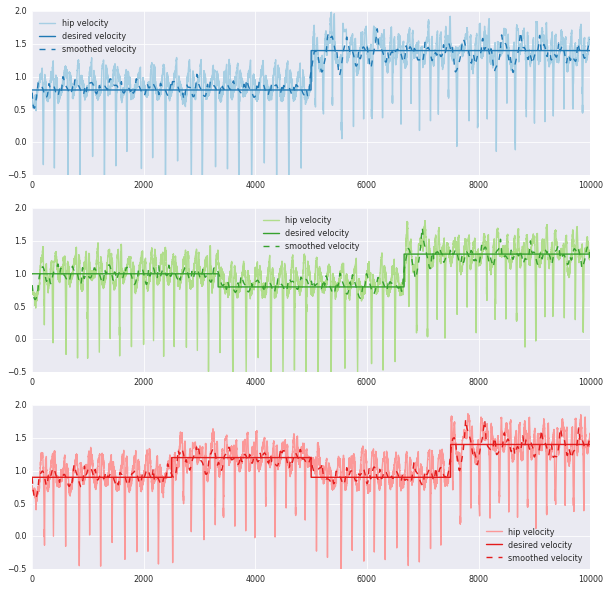

In [9]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="log/2000/data/vary_0.8_1.4_/vary_0.8_1.4_.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "-", color=colors[1], label="desired velocity")
ax1.plot(d1.vels_smooth, "--", color=colors[1], label="smoothed velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="log/2000/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "-", color=colors[3], label="desired velocity")
ax2.plot(d2.vels_smooth, "--", color=colors[3], label="smoothed velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="log/2000/data/vary_0.9_1.2_0.9_1.4_/vary_0.9_1.2_0.9_1.4_.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "-", color=colors[5], label="desired velocity")
ax3.plot(d3.vels_smooth, "--", color=colors[5], label="smoothed velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=0)

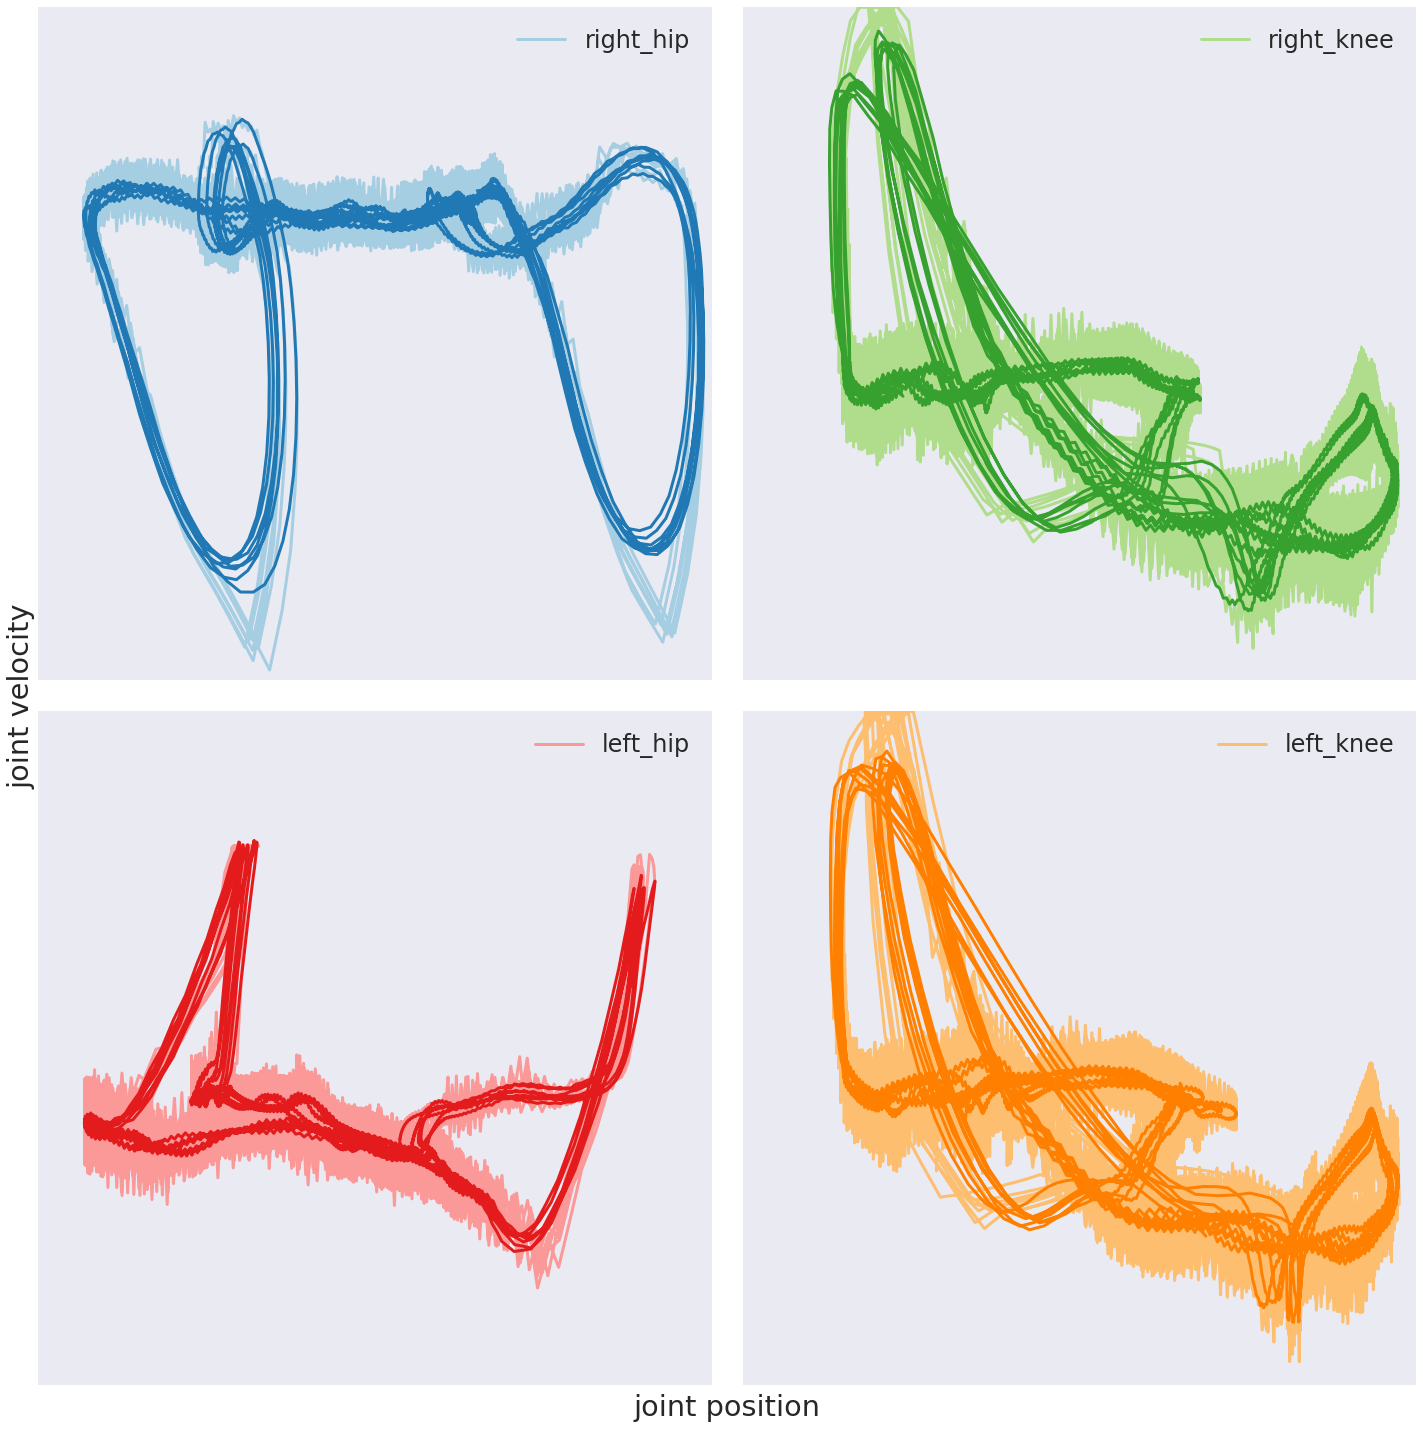

In [12]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
# colors = sns.hls_palette(8, l=.3, s=.8)
colors = sns.color_palette("Paired", 8)
fontsize = 2

d = Prep_Data(path="log/1000/data/fix_0.8_/fix_0.8.pkl")
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20))
joint_names = ["right_hip", "right_knee", "left_hip", "left_knee"]
start = 4000
cycle = 4000


i = 3
ax1.plot(d.states.T[i][start:start+cycle], 
         d.states.T[i+6][start:start+cycle], "-", 
         linewidth=3, color=colors[0], label=joint_names[i-3])
ax1.plot(savgol_filter(d.states.T[i][start:start+cycle], 21, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], 21, 3), "-", 
         linewidth=3, color=colors[1])
ax1.legend(loc = 0)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])

i = 4
ax2.plot(d.states.T[i][start:start+cycle], 
         d.states.T[i+6][start:start+cycle], "-", 
         linewidth=3, color=colors[2], label=joint_names[i-3])
ax2.plot(savgol_filter(d.states.T[i][start:start+cycle], 21, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], 21, 3), "-", 
         linewidth=3, color=colors[3])
ax2.legend(loc = 0)
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])

i = 5
ax3.plot(d.states.T[i][start:start+cycle], 
         d.states.T[i+6][start:start+cycle], "-", 
         linewidth=3, color=colors[4], label=joint_names[i-3])
ax3.plot(savgol_filter(d.states.T[i][start:start+cycle], 21, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], 21, 3), "-", 
         linewidth=3, color=colors[5])
ax3.legend(loc = 0)
ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([])

i = 6
ax4.plot(d.states.T[i][start:start+cycle], 
         d.states.T[i+6][start:start+cycle], "-", 
         linewidth=3, color=colors[6], label=joint_names[i-3])
ax4.plot(savgol_filter(d.states.T[i][start:start+cycle], 21, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], 21, 3), "-", 
         linewidth=3, color=colors[7])
ax4.legend(loc = 0)
ax4.xaxis.set_ticks([])
ax4.yaxis.set_ticks([])
    
f.text(0.5, 0.0, 'joint position', ha='center')
f.text(0.0, 0.5, 'joint velocity', va='center', rotation='vertical')
plt.tight_layout()



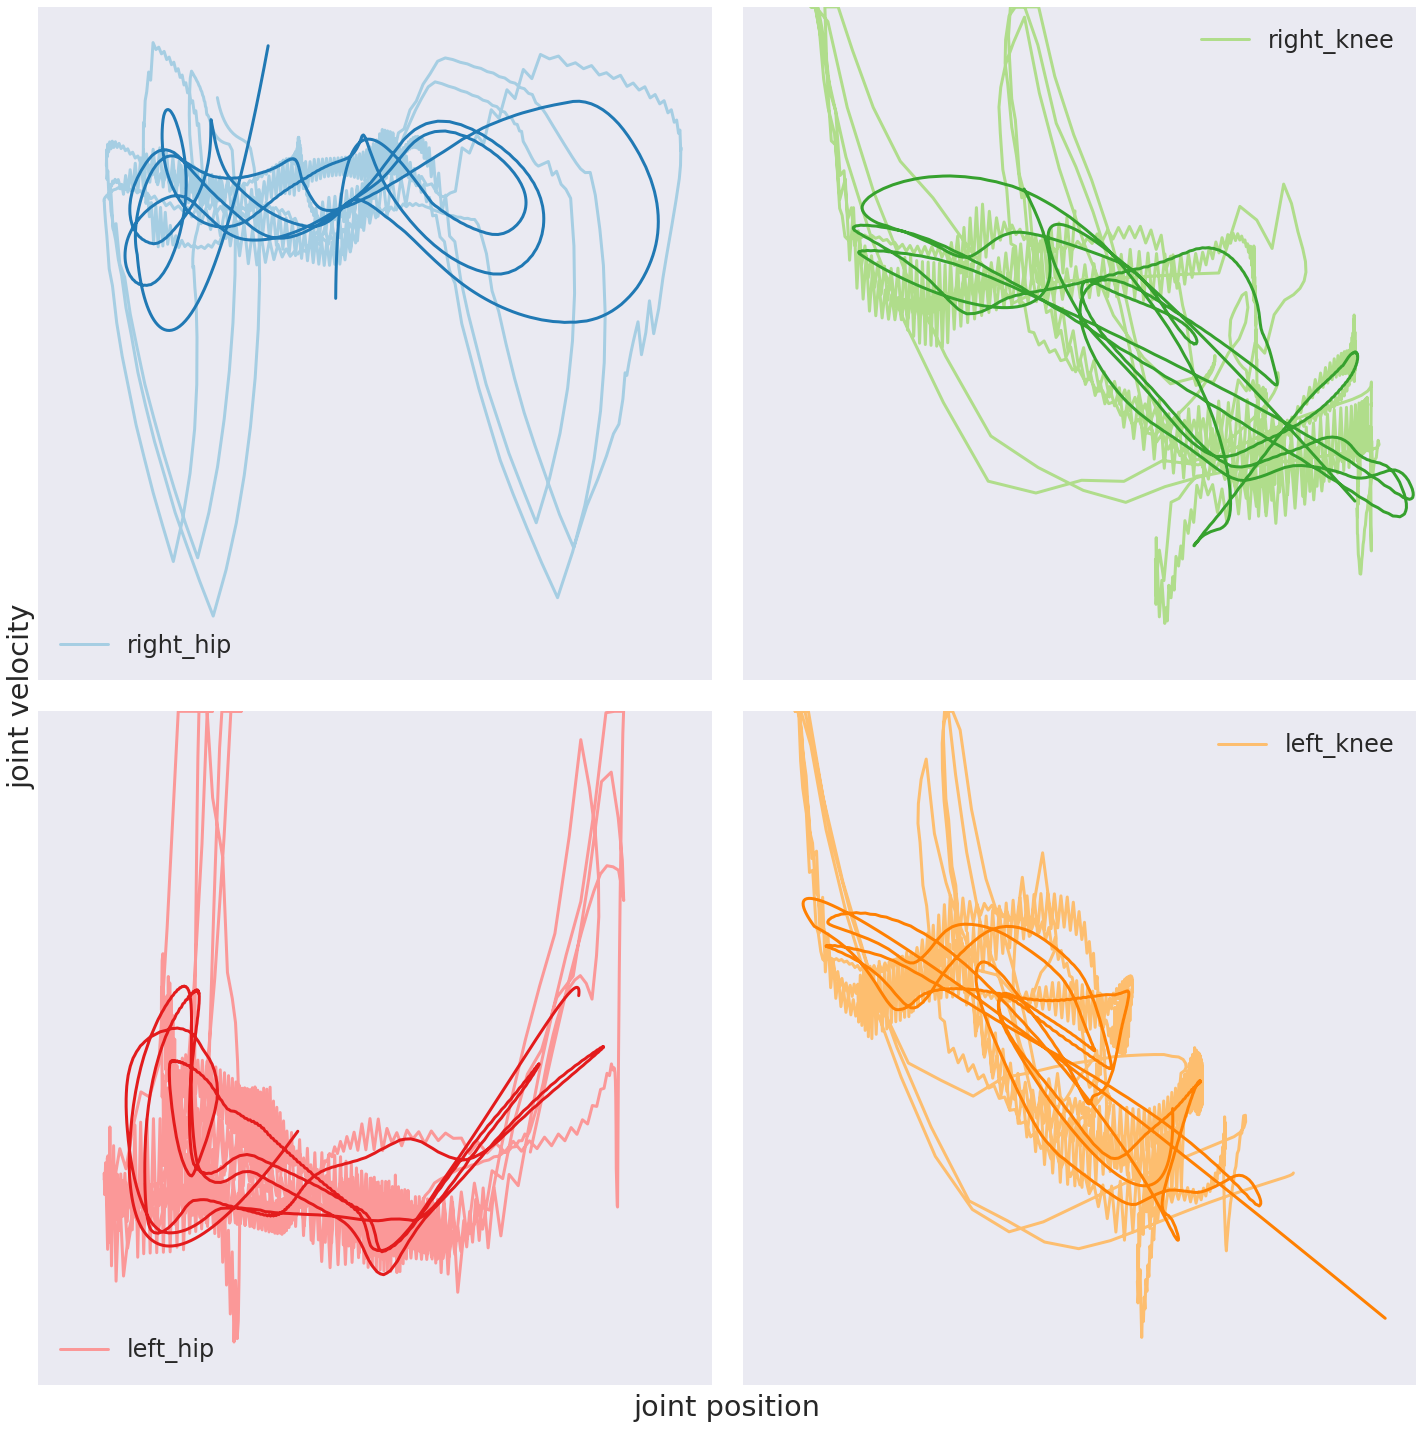

In [10]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
# colors = sns.hls_palette(8, l=.3, s=.8)
colors = sns.color_palette("Paired", 8)
fontsize = 2

d = Prep_Data(path="log/1000/data/fix_1.3_/fix_1.3.pkl")
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20))
joint_names = ["right_hip", "right_knee", "left_hip", "left_knee"]
start = 3000
cycle = 1000
f_size = 101

i = 3
ax1.plot(d.states.T[i][start:start+cycle], 
         d.states.T[i+6][start:start+cycle], "-", 
         linewidth=3, color=colors[0], label=joint_names[i-3])
ax1.plot(savgol_filter(d.states.T[i][start:start+cycle], f_size, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], f_size, 3), "-", 
         linewidth=3, color=colors[1])
ax1.legend(loc = 0)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])

i = 4
ax2.plot(d.states.T[i][start:start+cycle], 
         d.states.T[i+6][start:start+cycle], "-", 
         linewidth=3, color=colors[2], label=joint_names[i-3])
ax2.plot(savgol_filter(d.states.T[i][start:start+cycle], f_size, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], f_size, 3), "-", 
         linewidth=3, color=colors[3])
ax2.legend(loc = 0)
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])

i = 5
ax3.plot(d.states.T[i][start:start+cycle], 
         d.states.T[i+6][start:start+cycle], "-", 
         linewidth=3, color=colors[4], label=joint_names[i-3])
ax3.plot(savgol_filter(d.states.T[i][start:start+cycle], f_size, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], f_size, 3), "-", 
         linewidth=3, color=colors[5])
ax3.legend(loc = 0)
ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([])

i = 6
ax4.plot(d.states.T[i][start:start+cycle], 
         d.states.T[i+6][start:start+cycle], "-", 
         linewidth=3, color=colors[6], label=joint_names[i-3])
ax4.plot(savgol_filter(d.states.T[i][start:start+cycle], f_size, 3), 
         savgol_filter(d.states.T[i+6][start:start+cycle], f_size, 3), "-", 
         linewidth=3, color=colors[7])
ax4.legend(loc = 0)
ax4.xaxis.set_ticks([])
ax4.yaxis.set_ticks([])
    
f.text(0.5, 0.0, 'joint position', ha='center')
f.text(0.0, 0.5, 'joint velocity', va='center', rotation='vertical')
plt.tight_layout()



In [77]:
import imageio
filename = "log/data/fix_0.8_/openaigym.video.0.13658.video000000.mp4"
vid = imageio.get_reader(filename, 'ffmpeg')
for i, im in enumerate(vid):
    print i, im.shape


0 (500, 500, 3)
1 (500, 500, 3)
2 (500, 500, 3)
3 (500, 500, 3)
4 (500, 500, 3)
5 (500, 500, 3)
6 (500, 500, 3)
7 (500, 500, 3)
8 (500, 500, 3)
9 (500, 500, 3)
10 (500, 500, 3)
11 (500, 500, 3)
12 (500, 500, 3)
13 (500, 500, 3)
14 (500, 500, 3)
15 (500, 500, 3)
16 (500, 500, 3)
17 (500, 500, 3)
18 (500, 500, 3)
19 (500, 500, 3)
20 (500, 500, 3)
21 (500, 500, 3)
22 (500, 500, 3)
23 (500, 500, 3)
24 (500, 500, 3)
25 (500, 500, 3)
26 (500, 500, 3)
27 (500, 500, 3)
28 (500, 500, 3)
29 (500, 500, 3)
30 (500, 500, 3)
31 (500, 500, 3)
32 (500, 500, 3)
33 (500, 500, 3)
34 (500, 500, 3)
35 (500, 500, 3)
36 (500, 500, 3)
37 (500, 500, 3)
38 (500, 500, 3)
39 (500, 500, 3)
40 (500, 500, 3)
41 (500, 500, 3)
42 (500, 500, 3)
43 (500, 500, 3)
44 (500, 500, 3)
45 (500, 500, 3)
46 (500, 500, 3)
47 (500, 500, 3)
48 (500, 500, 3)
49 (500, 500, 3)
50 (500, 500, 3)
51 (500, 500, 3)
52 (500, 500, 3)
53 (500, 500, 3)
54 (500, 500, 3)
55 (500, 500, 3)
56 (500, 500, 3)
57 (500, 500, 3)
58 (500, 500, 3)
59 (500

644 (500, 500, 3)
645 (500, 500, 3)
646 (500, 500, 3)
647 (500, 500, 3)
648 (500, 500, 3)
649 (500, 500, 3)
650 (500, 500, 3)
651 (500, 500, 3)
652 (500, 500, 3)
653 (500, 500, 3)
654 (500, 500, 3)
655 (500, 500, 3)
656 (500, 500, 3)
657 (500, 500, 3)
658 (500, 500, 3)
659 (500, 500, 3)
660 (500, 500, 3)
661 (500, 500, 3)
662 (500, 500, 3)
663 (500, 500, 3)
664 (500, 500, 3)
665 (500, 500, 3)
666 (500, 500, 3)
667 (500, 500, 3)
668 (500, 500, 3)
669 (500, 500, 3)
670 (500, 500, 3)
671 (500, 500, 3)
672 (500, 500, 3)
673 (500, 500, 3)
674 (500, 500, 3)
675 (500, 500, 3)
676 (500, 500, 3)
677 (500, 500, 3)
678 (500, 500, 3)
679 (500, 500, 3)
680 (500, 500, 3)
681 (500, 500, 3)
682 (500, 500, 3)
683 (500, 500, 3)
684 (500, 500, 3)
685 (500, 500, 3)
686 (500, 500, 3)
687 (500, 500, 3)
688 (500, 500, 3)
689 (500, 500, 3)
690 (500, 500, 3)
691 (500, 500, 3)
692 (500, 500, 3)
693 (500, 500, 3)
694 (500, 500, 3)
695 (500, 500, 3)
696 (500, 500, 3)
697 (500, 500, 3)
698 (500, 500, 3)
699 (500, 

1278 (500, 500, 3)
1279 (500, 500, 3)
1280 (500, 500, 3)
1281 (500, 500, 3)
1282 (500, 500, 3)
1283 (500, 500, 3)
1284 (500, 500, 3)
1285 (500, 500, 3)
1286 (500, 500, 3)
1287 (500, 500, 3)
1288 (500, 500, 3)
1289 (500, 500, 3)
1290 (500, 500, 3)
1291 (500, 500, 3)
1292 (500, 500, 3)
1293 (500, 500, 3)
1294 (500, 500, 3)
1295 (500, 500, 3)
1296 (500, 500, 3)
1297 (500, 500, 3)
1298 (500, 500, 3)
1299 (500, 500, 3)
1300 (500, 500, 3)
1301 (500, 500, 3)
1302 (500, 500, 3)
1303 (500, 500, 3)
1304 (500, 500, 3)
1305 (500, 500, 3)
1306 (500, 500, 3)
1307 (500, 500, 3)
1308 (500, 500, 3)
1309 (500, 500, 3)
1310 (500, 500, 3)
1311 (500, 500, 3)
1312 (500, 500, 3)
1313 (500, 500, 3)
1314 (500, 500, 3)
1315 (500, 500, 3)
1316 (500, 500, 3)
1317 (500, 500, 3)
1318 (500, 500, 3)
1319 (500, 500, 3)
1320 (500, 500, 3)
1321 (500, 500, 3)
1322 (500, 500, 3)
1323 (500, 500, 3)
1324 (500, 500, 3)
1325 (500, 500, 3)
1326 (500, 500, 3)
1327 (500, 500, 3)
1328 (500, 500, 3)
1329 (500, 500, 3)
1330 (500, 5

1754 (500, 500, 3)
1755 (500, 500, 3)
1756 (500, 500, 3)
1757 (500, 500, 3)
1758 (500, 500, 3)
1759 (500, 500, 3)
1760 (500, 500, 3)
1761 (500, 500, 3)
1762 (500, 500, 3)
1763 (500, 500, 3)
1764 (500, 500, 3)
1765 (500, 500, 3)
1766 (500, 500, 3)
1767 (500, 500, 3)
1768 (500, 500, 3)
1769 (500, 500, 3)
1770 (500, 500, 3)
1771 (500, 500, 3)
1772 (500, 500, 3)
1773 (500, 500, 3)
1774 (500, 500, 3)
1775 (500, 500, 3)
1776 (500, 500, 3)
1777 (500, 500, 3)
1778 (500, 500, 3)
1779 (500, 500, 3)
1780 (500, 500, 3)
1781 (500, 500, 3)
1782 (500, 500, 3)
1783 (500, 500, 3)
1784 (500, 500, 3)
1785 (500, 500, 3)
1786 (500, 500, 3)
1787 (500, 500, 3)
1788 (500, 500, 3)
1789 (500, 500, 3)
1790 (500, 500, 3)
1791 (500, 500, 3)
1792 (500, 500, 3)
1793 (500, 500, 3)
1794 (500, 500, 3)
1795 (500, 500, 3)
1796 (500, 500, 3)
1797 (500, 500, 3)
1798 (500, 500, 3)
1799 (500, 500, 3)
1800 (500, 500, 3)
1801 (500, 500, 3)
1802 (500, 500, 3)
1803 (500, 500, 3)
1804 (500, 500, 3)
1805 (500, 500, 3)
1806 (500, 5

2208 (500, 500, 3)
2209 (500, 500, 3)
2210 (500, 500, 3)
2211 (500, 500, 3)
2212 (500, 500, 3)
2213 (500, 500, 3)
2214 (500, 500, 3)
2215 (500, 500, 3)
2216 (500, 500, 3)
2217 (500, 500, 3)
2218 (500, 500, 3)
2219 (500, 500, 3)
2220 (500, 500, 3)
2221 (500, 500, 3)
2222 (500, 500, 3)
2223 (500, 500, 3)
2224 (500, 500, 3)
2225 (500, 500, 3)
2226 (500, 500, 3)
2227 (500, 500, 3)
2228 (500, 500, 3)
2229 (500, 500, 3)
2230 (500, 500, 3)
2231 (500, 500, 3)
2232 (500, 500, 3)
2233 (500, 500, 3)
2234 (500, 500, 3)
2235 (500, 500, 3)
2236 (500, 500, 3)
2237 (500, 500, 3)
2238 (500, 500, 3)
2239 (500, 500, 3)
2240 (500, 500, 3)
2241 (500, 500, 3)
2242 (500, 500, 3)
2243 (500, 500, 3)
2244 (500, 500, 3)
2245 (500, 500, 3)
2246 (500, 500, 3)
2247 (500, 500, 3)
2248 (500, 500, 3)
2249 (500, 500, 3)
2250 (500, 500, 3)
2251 (500, 500, 3)
2252 (500, 500, 3)
2253 (500, 500, 3)
2254 (500, 500, 3)
2255 (500, 500, 3)
2256 (500, 500, 3)
2257 (500, 500, 3)
2258 (500, 500, 3)
2259 (500, 500, 3)
2260 (500, 5

2751 (500, 500, 3)
2752 (500, 500, 3)
2753 (500, 500, 3)
2754 (500, 500, 3)
2755 (500, 500, 3)
2756 (500, 500, 3)
2757 (500, 500, 3)
2758 (500, 500, 3)
2759 (500, 500, 3)
2760 (500, 500, 3)
2761 (500, 500, 3)
2762 (500, 500, 3)
2763 (500, 500, 3)
2764 (500, 500, 3)
2765 (500, 500, 3)
2766 (500, 500, 3)
2767 (500, 500, 3)
2768 (500, 500, 3)
2769 (500, 500, 3)
2770 (500, 500, 3)
2771 (500, 500, 3)
2772 (500, 500, 3)
2773 (500, 500, 3)
2774 (500, 500, 3)
2775 (500, 500, 3)
2776 (500, 500, 3)
2777 (500, 500, 3)
2778 (500, 500, 3)
2779 (500, 500, 3)
2780 (500, 500, 3)
2781 (500, 500, 3)
2782 (500, 500, 3)
2783 (500, 500, 3)
2784 (500, 500, 3)
2785 (500, 500, 3)
2786 (500, 500, 3)
2787 (500, 500, 3)
2788 (500, 500, 3)
2789 (500, 500, 3)
2790 (500, 500, 3)
2791 (500, 500, 3)
2792 (500, 500, 3)
2793 (500, 500, 3)
2794 (500, 500, 3)
2795 (500, 500, 3)
2796 (500, 500, 3)
2797 (500, 500, 3)
2798 (500, 500, 3)
2799 (500, 500, 3)
2800 (500, 500, 3)
2801 (500, 500, 3)
2802 (500, 500, 3)
2803 (500, 5

3190 (500, 500, 3)
3191 (500, 500, 3)
3192 (500, 500, 3)
3193 (500, 500, 3)
3194 (500, 500, 3)
3195 (500, 500, 3)
3196 (500, 500, 3)
3197 (500, 500, 3)
3198 (500, 500, 3)
3199 (500, 500, 3)
3200 (500, 500, 3)
3201 (500, 500, 3)
3202 (500, 500, 3)
3203 (500, 500, 3)
3204 (500, 500, 3)
3205 (500, 500, 3)
3206 (500, 500, 3)
3207 (500, 500, 3)
3208 (500, 500, 3)
3209 (500, 500, 3)
3210 (500, 500, 3)
3211 (500, 500, 3)
3212 (500, 500, 3)
3213 (500, 500, 3)
3214 (500, 500, 3)
3215 (500, 500, 3)
3216 (500, 500, 3)
3217 (500, 500, 3)
3218 (500, 500, 3)
3219 (500, 500, 3)
3220 (500, 500, 3)
3221 (500, 500, 3)
3222 (500, 500, 3)
3223 (500, 500, 3)
3224 (500, 500, 3)
3225 (500, 500, 3)
3226 (500, 500, 3)
3227 (500, 500, 3)
3228 (500, 500, 3)
3229 (500, 500, 3)
3230 (500, 500, 3)
3231 (500, 500, 3)
3232 (500, 500, 3)
3233 (500, 500, 3)
3234 (500, 500, 3)
3235 (500, 500, 3)
3236 (500, 500, 3)
3237 (500, 500, 3)
3238 (500, 500, 3)
3239 (500, 500, 3)
3240 (500, 500, 3)
3241 (500, 500, 3)
3242 (500, 5

3779 (500, 500, 3)
3780 (500, 500, 3)
3781 (500, 500, 3)
3782 (500, 500, 3)
3783 (500, 500, 3)
3784 (500, 500, 3)
3785 (500, 500, 3)
3786 (500, 500, 3)
3787 (500, 500, 3)
3788 (500, 500, 3)
3789 (500, 500, 3)
3790 (500, 500, 3)
3791 (500, 500, 3)
3792 (500, 500, 3)
3793 (500, 500, 3)
3794 (500, 500, 3)
3795 (500, 500, 3)
3796 (500, 500, 3)
3797 (500, 500, 3)
3798 (500, 500, 3)
3799 (500, 500, 3)
3800 (500, 500, 3)
3801 (500, 500, 3)
3802 (500, 500, 3)
3803 (500, 500, 3)
3804 (500, 500, 3)
3805 (500, 500, 3)
3806 (500, 500, 3)
3807 (500, 500, 3)
3808 (500, 500, 3)
3809 (500, 500, 3)
3810 (500, 500, 3)
3811 (500, 500, 3)
3812 (500, 500, 3)
3813 (500, 500, 3)
3814 (500, 500, 3)
3815 (500, 500, 3)
3816 (500, 500, 3)
3817 (500, 500, 3)
3818 (500, 500, 3)
3819 (500, 500, 3)
3820 (500, 500, 3)
3821 (500, 500, 3)
3822 (500, 500, 3)
3823 (500, 500, 3)
3824 (500, 500, 3)
3825 (500, 500, 3)
3826 (500, 500, 3)
3827 (500, 500, 3)
3828 (500, 500, 3)
3829 (500, 500, 3)
3830 (500, 500, 3)
3831 (500, 5

4370 (500, 500, 3)
4371 (500, 500, 3)
4372 (500, 500, 3)
4373 (500, 500, 3)
4374 (500, 500, 3)
4375 (500, 500, 3)
4376 (500, 500, 3)
4377 (500, 500, 3)
4378 (500, 500, 3)
4379 (500, 500, 3)
4380 (500, 500, 3)
4381 (500, 500, 3)
4382 (500, 500, 3)
4383 (500, 500, 3)
4384 (500, 500, 3)
4385 (500, 500, 3)
4386 (500, 500, 3)
4387 (500, 500, 3)
4388 (500, 500, 3)
4389 (500, 500, 3)
4390 (500, 500, 3)
4391 (500, 500, 3)
4392 (500, 500, 3)
4393 (500, 500, 3)
4394 (500, 500, 3)
4395 (500, 500, 3)
4396 (500, 500, 3)
4397 (500, 500, 3)
4398 (500, 500, 3)
4399 (500, 500, 3)
4400 (500, 500, 3)
4401 (500, 500, 3)
4402 (500, 500, 3)
4403 (500, 500, 3)
4404 (500, 500, 3)
4405 (500, 500, 3)
4406 (500, 500, 3)
4407 (500, 500, 3)
4408 (500, 500, 3)
4409 (500, 500, 3)
4410 (500, 500, 3)
4411 (500, 500, 3)
4412 (500, 500, 3)
4413 (500, 500, 3)
4414 (500, 500, 3)
4415 (500, 500, 3)
4416 (500, 500, 3)
4417 (500, 500, 3)
4418 (500, 500, 3)
4419 (500, 500, 3)
4420 (500, 500, 3)
4421 (500, 500, 3)
4422 (500, 5

4831 (500, 500, 3)
4832 (500, 500, 3)
4833 (500, 500, 3)
4834 (500, 500, 3)
4835 (500, 500, 3)
4836 (500, 500, 3)
4837 (500, 500, 3)
4838 (500, 500, 3)
4839 (500, 500, 3)
4840 (500, 500, 3)
4841 (500, 500, 3)
4842 (500, 500, 3)
4843 (500, 500, 3)
4844 (500, 500, 3)
4845 (500, 500, 3)
4846 (500, 500, 3)
4847 (500, 500, 3)
4848 (500, 500, 3)
4849 (500, 500, 3)
4850 (500, 500, 3)
4851 (500, 500, 3)
4852 (500, 500, 3)
4853 (500, 500, 3)
4854 (500, 500, 3)
4855 (500, 500, 3)
4856 (500, 500, 3)
4857 (500, 500, 3)
4858 (500, 500, 3)
4859 (500, 500, 3)
4860 (500, 500, 3)
4861 (500, 500, 3)
4862 (500, 500, 3)
4863 (500, 500, 3)
4864 (500, 500, 3)
4865 (500, 500, 3)
4866 (500, 500, 3)
4867 (500, 500, 3)
4868 (500, 500, 3)
4869 (500, 500, 3)
4870 (500, 500, 3)
4871 (500, 500, 3)
4872 (500, 500, 3)
4873 (500, 500, 3)
4874 (500, 500, 3)
4875 (500, 500, 3)
4876 (500, 500, 3)
4877 (500, 500, 3)
4878 (500, 500, 3)
4879 (500, 500, 3)
4880 (500, 500, 3)
4881 (500, 500, 3)
4882 (500, 500, 3)
4883 (500, 5

5323 (500, 500, 3)
5324 (500, 500, 3)
5325 (500, 500, 3)
5326 (500, 500, 3)
5327 (500, 500, 3)
5328 (500, 500, 3)
5329 (500, 500, 3)
5330 (500, 500, 3)
5331 (500, 500, 3)
5332 (500, 500, 3)
5333 (500, 500, 3)
5334 (500, 500, 3)
5335 (500, 500, 3)
5336 (500, 500, 3)
5337 (500, 500, 3)
5338 (500, 500, 3)
5339 (500, 500, 3)
5340 (500, 500, 3)
5341 (500, 500, 3)
5342 (500, 500, 3)
5343 (500, 500, 3)
5344 (500, 500, 3)
5345 (500, 500, 3)
5346 (500, 500, 3)
5347 (500, 500, 3)
5348 (500, 500, 3)
5349 (500, 500, 3)
5350 (500, 500, 3)
5351 (500, 500, 3)
5352 (500, 500, 3)
5353 (500, 500, 3)
5354 (500, 500, 3)
5355 (500, 500, 3)
5356 (500, 500, 3)
5357 (500, 500, 3)
5358 (500, 500, 3)
5359 (500, 500, 3)
5360 (500, 500, 3)
5361 (500, 500, 3)
5362 (500, 500, 3)
5363 (500, 500, 3)
5364 (500, 500, 3)
5365 (500, 500, 3)
5366 (500, 500, 3)
5367 (500, 500, 3)
5368 (500, 500, 3)
5369 (500, 500, 3)
5370 (500, 500, 3)
5371 (500, 500, 3)
5372 (500, 500, 3)
5373 (500, 500, 3)
5374 (500, 500, 3)
5375 (500, 5

5815 (500, 500, 3)
5816 (500, 500, 3)
5817 (500, 500, 3)
5818 (500, 500, 3)
5819 (500, 500, 3)
5820 (500, 500, 3)
5821 (500, 500, 3)
5822 (500, 500, 3)
5823 (500, 500, 3)
5824 (500, 500, 3)
5825 (500, 500, 3)
5826 (500, 500, 3)
5827 (500, 500, 3)
5828 (500, 500, 3)
5829 (500, 500, 3)
5830 (500, 500, 3)
5831 (500, 500, 3)
5832 (500, 500, 3)
5833 (500, 500, 3)
5834 (500, 500, 3)
5835 (500, 500, 3)
5836 (500, 500, 3)
5837 (500, 500, 3)
5838 (500, 500, 3)
5839 (500, 500, 3)
5840 (500, 500, 3)
5841 (500, 500, 3)
5842 (500, 500, 3)
5843 (500, 500, 3)
5844 (500, 500, 3)
5845 (500, 500, 3)
5846 (500, 500, 3)
5847 (500, 500, 3)
5848 (500, 500, 3)
5849 (500, 500, 3)
5850 (500, 500, 3)
5851 (500, 500, 3)
5852 (500, 500, 3)
5853 (500, 500, 3)
5854 (500, 500, 3)
5855 (500, 500, 3)
5856 (500, 500, 3)
5857 (500, 500, 3)
5858 (500, 500, 3)
5859 (500, 500, 3)
5860 (500, 500, 3)
5861 (500, 500, 3)
5862 (500, 500, 3)
5863 (500, 500, 3)
5864 (500, 500, 3)
5865 (500, 500, 3)
5866 (500, 500, 3)
5867 (500, 5

6284 (500, 500, 3)
6285 (500, 500, 3)
6286 (500, 500, 3)
6287 (500, 500, 3)
6288 (500, 500, 3)
6289 (500, 500, 3)
6290 (500, 500, 3)
6291 (500, 500, 3)
6292 (500, 500, 3)
6293 (500, 500, 3)
6294 (500, 500, 3)
6295 (500, 500, 3)
6296 (500, 500, 3)
6297 (500, 500, 3)
6298 (500, 500, 3)
6299 (500, 500, 3)
6300 (500, 500, 3)
6301 (500, 500, 3)
6302 (500, 500, 3)
6303 (500, 500, 3)
6304 (500, 500, 3)
6305 (500, 500, 3)
6306 (500, 500, 3)
6307 (500, 500, 3)
6308 (500, 500, 3)
6309 (500, 500, 3)
6310 (500, 500, 3)
6311 (500, 500, 3)
6312 (500, 500, 3)
6313 (500, 500, 3)
6314 (500, 500, 3)
6315 (500, 500, 3)
6316 (500, 500, 3)
6317 (500, 500, 3)
6318 (500, 500, 3)
6319 (500, 500, 3)
6320 (500, 500, 3)
6321 (500, 500, 3)
6322 (500, 500, 3)
6323 (500, 500, 3)
6324 (500, 500, 3)
6325 (500, 500, 3)
6326 (500, 500, 3)
6327 (500, 500, 3)
6328 (500, 500, 3)
6329 (500, 500, 3)
6330 (500, 500, 3)
6331 (500, 500, 3)
6332 (500, 500, 3)
6333 (500, 500, 3)
6334 (500, 500, 3)
6335 (500, 500, 3)
6336 (500, 5

6885 (500, 500, 3)
6886 (500, 500, 3)
6887 (500, 500, 3)
6888 (500, 500, 3)
6889 (500, 500, 3)
6890 (500, 500, 3)
6891 (500, 500, 3)
6892 (500, 500, 3)
6893 (500, 500, 3)
6894 (500, 500, 3)
6895 (500, 500, 3)
6896 (500, 500, 3)
6897 (500, 500, 3)
6898 (500, 500, 3)
6899 (500, 500, 3)
6900 (500, 500, 3)
6901 (500, 500, 3)
6902 (500, 500, 3)
6903 (500, 500, 3)
6904 (500, 500, 3)
6905 (500, 500, 3)
6906 (500, 500, 3)
6907 (500, 500, 3)
6908 (500, 500, 3)
6909 (500, 500, 3)
6910 (500, 500, 3)
6911 (500, 500, 3)
6912 (500, 500, 3)
6913 (500, 500, 3)
6914 (500, 500, 3)
6915 (500, 500, 3)
6916 (500, 500, 3)
6917 (500, 500, 3)
6918 (500, 500, 3)
6919 (500, 500, 3)
6920 (500, 500, 3)
6921 (500, 500, 3)
6922 (500, 500, 3)
6923 (500, 500, 3)
6924 (500, 500, 3)
6925 (500, 500, 3)
6926 (500, 500, 3)
6927 (500, 500, 3)
6928 (500, 500, 3)
6929 (500, 500, 3)
6930 (500, 500, 3)
6931 (500, 500, 3)
6932 (500, 500, 3)
6933 (500, 500, 3)
6934 (500, 500, 3)
6935 (500, 500, 3)
6936 (500, 500, 3)
6937 (500, 5

7388 (500, 500, 3)
7389 (500, 500, 3)
7390 (500, 500, 3)
7391 (500, 500, 3)
7392 (500, 500, 3)
7393 (500, 500, 3)
7394 (500, 500, 3)
7395 (500, 500, 3)
7396 (500, 500, 3)
7397 (500, 500, 3)
7398 (500, 500, 3)
7399 (500, 500, 3)
7400 (500, 500, 3)
7401 (500, 500, 3)
7402 (500, 500, 3)
7403 (500, 500, 3)
7404 (500, 500, 3)
7405 (500, 500, 3)
7406 (500, 500, 3)
7407 (500, 500, 3)
7408 (500, 500, 3)
7409 (500, 500, 3)
7410 (500, 500, 3)
7411 (500, 500, 3)
7412 (500, 500, 3)
7413 (500, 500, 3)
7414 (500, 500, 3)
7415 (500, 500, 3)
7416 (500, 500, 3)
7417 (500, 500, 3)
7418 (500, 500, 3)
7419 (500, 500, 3)
7420 (500, 500, 3)
7421 (500, 500, 3)
7422 (500, 500, 3)
7423 (500, 500, 3)
7424 (500, 500, 3)
7425 (500, 500, 3)
7426 (500, 500, 3)
7427 (500, 500, 3)
7428 (500, 500, 3)
7429 (500, 500, 3)
7430 (500, 500, 3)
7431 (500, 500, 3)
7432 (500, 500, 3)
7433 (500, 500, 3)
7434 (500, 500, 3)
7435 (500, 500, 3)
7436 (500, 500, 3)
7437 (500, 500, 3)
7438 (500, 500, 3)
7439 (500, 500, 3)
7440 (500, 5

7882 (500, 500, 3)
7883 (500, 500, 3)
7884 (500, 500, 3)
7885 (500, 500, 3)
7886 (500, 500, 3)
7887 (500, 500, 3)
7888 (500, 500, 3)
7889 (500, 500, 3)
7890 (500, 500, 3)
7891 (500, 500, 3)
7892 (500, 500, 3)
7893 (500, 500, 3)
7894 (500, 500, 3)
7895 (500, 500, 3)
7896 (500, 500, 3)
7897 (500, 500, 3)
7898 (500, 500, 3)
7899 (500, 500, 3)
7900 (500, 500, 3)
7901 (500, 500, 3)
7902 (500, 500, 3)
7903 (500, 500, 3)
7904 (500, 500, 3)
7905 (500, 500, 3)
7906 (500, 500, 3)
7907 (500, 500, 3)
7908 (500, 500, 3)
7909 (500, 500, 3)
7910 (500, 500, 3)
7911 (500, 500, 3)
7912 (500, 500, 3)
7913 (500, 500, 3)
7914 (500, 500, 3)
7915 (500, 500, 3)
7916 (500, 500, 3)
7917 (500, 500, 3)
7918 (500, 500, 3)
7919 (500, 500, 3)
7920 (500, 500, 3)
7921 (500, 500, 3)
7922 (500, 500, 3)
7923 (500, 500, 3)
7924 (500, 500, 3)
7925 (500, 500, 3)
7926 (500, 500, 3)
7927 (500, 500, 3)
7928 (500, 500, 3)
7929 (500, 500, 3)
7930 (500, 500, 3)
7931 (500, 500, 3)
7932 (500, 500, 3)
7933 (500, 500, 3)
7934 (500, 5

8425 (500, 500, 3)
8426 (500, 500, 3)
8427 (500, 500, 3)
8428 (500, 500, 3)
8429 (500, 500, 3)
8430 (500, 500, 3)
8431 (500, 500, 3)
8432 (500, 500, 3)
8433 (500, 500, 3)
8434 (500, 500, 3)
8435 (500, 500, 3)
8436 (500, 500, 3)
8437 (500, 500, 3)
8438 (500, 500, 3)
8439 (500, 500, 3)
8440 (500, 500, 3)
8441 (500, 500, 3)
8442 (500, 500, 3)
8443 (500, 500, 3)
8444 (500, 500, 3)
8445 (500, 500, 3)
8446 (500, 500, 3)
8447 (500, 500, 3)
8448 (500, 500, 3)
8449 (500, 500, 3)
8450 (500, 500, 3)
8451 (500, 500, 3)
8452 (500, 500, 3)
8453 (500, 500, 3)
8454 (500, 500, 3)
8455 (500, 500, 3)
8456 (500, 500, 3)
8457 (500, 500, 3)
8458 (500, 500, 3)
8459 (500, 500, 3)
8460 (500, 500, 3)
8461 (500, 500, 3)
8462 (500, 500, 3)
8463 (500, 500, 3)
8464 (500, 500, 3)
8465 (500, 500, 3)
8466 (500, 500, 3)
8467 (500, 500, 3)
8468 (500, 500, 3)
8469 (500, 500, 3)
8470 (500, 500, 3)
8471 (500, 500, 3)
8472 (500, 500, 3)
8473 (500, 500, 3)
8474 (500, 500, 3)
8475 (500, 500, 3)
8476 (500, 500, 3)
8477 (500, 5

8913 (500, 500, 3)
8914 (500, 500, 3)
8915 (500, 500, 3)
8916 (500, 500, 3)
8917 (500, 500, 3)
8918 (500, 500, 3)
8919 (500, 500, 3)
8920 (500, 500, 3)
8921 (500, 500, 3)
8922 (500, 500, 3)
8923 (500, 500, 3)
8924 (500, 500, 3)
8925 (500, 500, 3)
8926 (500, 500, 3)
8927 (500, 500, 3)
8928 (500, 500, 3)
8929 (500, 500, 3)
8930 (500, 500, 3)
8931 (500, 500, 3)
8932 (500, 500, 3)
8933 (500, 500, 3)
8934 (500, 500, 3)
8935 (500, 500, 3)
8936 (500, 500, 3)
8937 (500, 500, 3)
8938 (500, 500, 3)
8939 (500, 500, 3)
8940 (500, 500, 3)
8941 (500, 500, 3)
8942 (500, 500, 3)
8943 (500, 500, 3)
8944 (500, 500, 3)
8945 (500, 500, 3)
8946 (500, 500, 3)
8947 (500, 500, 3)
8948 (500, 500, 3)
8949 (500, 500, 3)
8950 (500, 500, 3)
8951 (500, 500, 3)
8952 (500, 500, 3)
8953 (500, 500, 3)
8954 (500, 500, 3)
8955 (500, 500, 3)
8956 (500, 500, 3)
8957 (500, 500, 3)
8958 (500, 500, 3)
8959 (500, 500, 3)
8960 (500, 500, 3)
8961 (500, 500, 3)
8962 (500, 500, 3)
8963 (500, 500, 3)
8964 (500, 500, 3)
8965 (500, 5

9543 (500, 500, 3)
9544 (500, 500, 3)
9545 (500, 500, 3)
9546 (500, 500, 3)
9547 (500, 500, 3)
9548 (500, 500, 3)
9549 (500, 500, 3)
9550 (500, 500, 3)
9551 (500, 500, 3)
9552 (500, 500, 3)
9553 (500, 500, 3)
9554 (500, 500, 3)
9555 (500, 500, 3)
9556 (500, 500, 3)
9557 (500, 500, 3)
9558 (500, 500, 3)
9559 (500, 500, 3)
9560 (500, 500, 3)
9561 (500, 500, 3)
9562 (500, 500, 3)
9563 (500, 500, 3)
9564 (500, 500, 3)
9565 (500, 500, 3)
9566 (500, 500, 3)
9567 (500, 500, 3)
9568 (500, 500, 3)
9569 (500, 500, 3)
9570 (500, 500, 3)
9571 (500, 500, 3)
9572 (500, 500, 3)
9573 (500, 500, 3)
9574 (500, 500, 3)
9575 (500, 500, 3)
9576 (500, 500, 3)
9577 (500, 500, 3)
9578 (500, 500, 3)
9579 (500, 500, 3)
9580 (500, 500, 3)
9581 (500, 500, 3)
9582 (500, 500, 3)
9583 (500, 500, 3)
9584 (500, 500, 3)
9585 (500, 500, 3)
9586 (500, 500, 3)
9587 (500, 500, 3)
9588 (500, 500, 3)
9589 (500, 500, 3)
9590 (500, 500, 3)
9591 (500, 500, 3)
9592 (500, 500, 3)
9593 (500, 500, 3)
9594 (500, 500, 3)
9595 (500, 5